In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [117]:
df = pd.read_csv("C:/Users/admin/Downloads/googleplaystoreclean.csv", index_col = 0)

In [118]:
print(df.shape)
df.head(5)

(9360, 12)


,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [119]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews           float64
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [120]:
df.describe()

,Rating,Reviews,Installs,Price
count,9360.000000,9.360000e+03,9.360000e+03,9360.000000
mean,4.191838,5.143767e+05,1.790875e+07,0.961279
std,0.515263,3.145023e+06,9.126637e+07,15.821640
min,1.000000,1.000000e+00,1.000000e+00,0.000000
25%,4.000000,1.867500e+02,1.000000e+04,0.000000
50%,4.300000,5.955000e+03,5.000000e+05,0.000000
75%,4.500000,8.162750e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


In [121]:
df.groupby('Type').count()

,App,Category,Rating,Reviews,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
Type,,,,,,,,,,,
Free,8715,8715,8715,8715,8715,8715,8715,8715,8715,8715,8715
Paid,645,645,645,645,645,645,645,645,645,645,645


In [122]:
df[['Category','App']].groupby('Category').count().sort_values('App',ascending = False)

,App
Category,
FAMILY,1746
GAME,1097
TOOLS,733
PRODUCTIVITY,351
MEDICAL,350
COMMUNICATION,328
FINANCE,323
SPORTS,319
PHOTOGRAPHY,317


### Data Cleaning

In [42]:
duplicate_counts = df['App'].duplicated().sum()
print(f"Number of duplicate App names: {duplicate_counts}")

# Show duplicated entries (all occurrences, not just duplicates)
duplicates = df[df['App'].duplicated(keep=False)]
display(duplicates)

Number of duplicate App names: 1170


,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
36,UNICORN - Color By Number & Pixel Art Coloring,ART_AND_DESIGN,4.7,8145.0,500000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-08-02,1.0.9,4.4 and up
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221.0,10000000.0,Free,0.0,Everyone,Art & Design,2018-07-30,Varies with device,Varies with device
139,Wattpad 📖 Free Books,BOOKS_AND_REFERENCE,4.6,2914724.0,100000000.0,Free,0.0,Teen,Books & Reference,2018-08-01,Varies with device,Varies with device
143,Amazon Kindle,BOOKS_AND_REFERENCE,4.2,814080.0,100000000.0,Free,0.0,Teen,Books & Reference,2018-07-27,Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...
10715,FarmersOnly Dating,DATING,3.0,1145.0,100000.0,Free,0.0,Mature 17+,Dating,2016-02-25,2.2,4.0 and up
10720,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981.0,1000000.0,Free,0.0,Everyone,Communication,2018-07-06,5.2,5.0 and up
10730,FP Notebook,MEDICAL,4.5,410.0,50000.0,Free,0.0,Everyone,Medical,2018-03-24,2.1.0.372,4.4 and up
10753,Slickdeals: Coupons & Shopping,SHOPPING,4.5,33599.0,1000000.0,Free,0.0,Everyone,Shopping,2018-07-30,3.9,4.4 and up


In [43]:
# Compare duplicates to see how they differ
df[df['App'].duplicated(keep=False)].sort_values(by='App').head(10)

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1393,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490.0,500000.0,Free,0.00,Everyone 10+,Health & Fitness,2017-02-17,1.9,2.3.3 and up
1407,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490.0,500000.0,Free,0.00,Everyone 10+,Health & Fitness,2017-02-17,1.9,2.3.3 and up
2543,1800 Contacts - Lens Store,MEDICAL,4.7,23160.0,1000000.0,Free,0.00,Everyone,Medical,2018-07-27,7.4.1,5.0 and up
2322,1800 Contacts - Lens Store,MEDICAL,4.7,23160.0,1000000.0,Free,0.00,Everyone,Medical,2018-07-27,7.4.1,5.0 and up
2256,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12.0,1000.0,Paid,16.99,Everyone,Medical,2017-01-27,1.0.5,4.0.3 and up
2385,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12.0,1000.0,Paid,16.99,Everyone,Medical,2017-01-27,1.0.5,4.0.3 and up
1337,21-Day Meditation Experience,HEALTH_AND_FITNESS,4.4,11506.0,100000.0,Free,0.00,Everyone,Health & Fitness,2018-08-02,3.0.0,4.1 and up
1434,21-Day Meditation Experience,HEALTH_AND_FITNESS,4.4,11506.0,100000.0,Free,0.00,Everyone,Health & Fitness,2018-08-02,3.0.0,4.1 and up
5415,365Scores - Live Scores,SPORTS,4.6,666246.0,10000000.0,Free,0.00,Everyone,Sports,2018-07-29,5.5.9,4.1 and up
3083,365Scores - Live Scores,SPORTS,4.6,666521.0,10000000.0,Free,0.00,Everyone,Sports,2018-07-29,5.5.9,4.1 and up


We have checked the duplicates. They do not seem to be accidental duplicates and are snapshots of the same app at different time points. For purpose of the first question, we will remove duplicated apps and keep the latest version.

In [123]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')
df = df.sort_values(by='Last Updated')

# drop duplicates by App, keeping the most recent one
df = df.drop_duplicates(subset='App', keep='last')

df = df.reset_index(drop=True)

In [45]:
# Check null values
missing_counts = df.isnull().sum()

missing_percent = (df.isnull().sum()/len(df)) * 100

missing_summary = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing %': missing_percent.round(2)
})

missing_summary = missing_summary[missing_summary['Missing Count'] > 0]
missing_summary


,Missing Count,Missing %


## Question 1

### Metrics approximates

We do not have actual profit data, so we can try using proxies.

| **Proxy**              | **Description**                    | **Used for**                     |
| ---------------------- | ---------------------------------- | -------------------------------- |
| **Installs**           | Measures reach and popularity      | Potential for ad revenue and IAP |
| **Reviews / Installs** | Engagement proxy                   | Indicates active, retained users |
| **Price × Installs**   | Proxy for total revenue (for Paid) | Approximate direct app sales     |
| **Average Rating**     | Quality and user satisfaction      | Retention and organic growth     |

In [46]:
# Aggregate by category
category_summary = df.groupby('Category').agg({
    'Installs': 'sum',
    'Reviews': 'sum',
    'Rating': 'mean',
    'Price': 'mean',
    'App': 'count'
}).rename(columns={'App': 'Num_Apps'}).reset_index()
category_summary['Avg_Installs'] = category_summary['Installs'] / category_summary['Num_Apps']
category_summary['Avg_Reviews'] = category_summary['Reviews'] / category_summary['Num_Apps']
category_summary['Engagement'] = category_summary['Avg_Reviews'] / category_summary['Avg_Installs']

In [47]:
category_summary.head(10)

,Category,Installs,Reviews,Rating,Price,Num_Apps,Avg_Installs,Avg_Reviews,Engagement
0,ART_AND_DESIGN,1.142281e+08,1419096.0,4.376667,0.099500,60,1.903802e+06,2.365160e+04,0.012423
1,AUTO_AND_VEHICLES,5.312980e+07,1163630.0,4.190411,0.027260,73,7.278055e+05,1.594014e+04,0.021902
2,BEAUTY,2.691620e+07,395133.0,4.278571,0.000000,42,6.408619e+05,9.407929e+03,0.014680
3,BOOKS_AND_REFERENCE,1.665792e+09,16722347.0,4.344970,0.141302,169,9.856755e+06,9.894880e+04,0.010039
4,BUSINESS,6.920181e+08,9701585.0,4.096565,0.245840,262,2.641291e+06,3.702895e+04,0.014019
5,COMICS,4.493110e+07,2340740.0,4.181481,0.000000,54,8.320574e+05,4.334704e+04,0.052096
6,COMMUNICATION,1.103924e+10,285831180.0,4.121401,0.220584,257,4.295425e+07,1.112184e+06,0.025892
7,DATING,1.409114e+08,3623401.0,3.980451,0.090075,133,1.059484e+06,2.724362e+04,0.025714
8,EDUCATION,2.253520e+08,6598958.0,4.362162,0.161802,111,2.030198e+06,5.945007e+04,0.029283
9,ENTERTAINMENT,9.471600e+08,23801039.0,4.128090,0.089663,89,1.064225e+07,2.674274e+05,0.025129


In [48]:
# Sort by average installs (reach)
top_by_installs = category_summary.sort_values(by='Avg_Installs', ascending=False)
top_by_installs.head(10)

,Category,Installs,Reviews,Rating,Price,Num_Apps,Avg_Installs,Avg_Reviews,Engagement
6,COMMUNICATION,1.103924e+10,285831180.0,4.121401,0.220584,257,4.295425e+07,1.112184e+06,0.025892
27,SOCIAL,5.487841e+09,227916839.0,4.247291,0.009754,203,2.703370e+07,1.122743e+06,0.041531
31,VIDEO_PLAYERS,3.916797e+09,67331331.0,4.044898,0.071156,147,2.664488e+07,4.580363e+05,0.017190
25,PRODUCTIVITY,5.788070e+09,55577520.0,4.183389,0.235615,301,1.922947e+07,1.846429e+05,0.009602
24,PHOTOGRAPHY,4.658143e+09,105423458.0,4.156654,0.274943,263,1.771157e+07,4.008497e+05,0.022632
30,TRAVEL_AND_LOCAL,2.894859e+09,26816510.0,4.069519,0.200481,187,1.548053e+07,1.434038e+05,0.009263
14,GAME,1.280276e+10,573297517.0,4.243638,0.309565,896,1.428880e+07,6.398410e+05,0.044779
21,NEWS_AND_MAGAZINES,2.369111e+09,23129256.0,4.121569,0.019510,204,1.161329e+07,1.133787e+05,0.009763
29,TOOLS,8.100224e+09,229387073.0,4.040334,0.289152,719,1.126596e+07,3.190363e+05,0.028319
9,ENTERTAINMENT,9.471600e+08,23801039.0,4.128090,0.089663,89,1.064225e+07,2.674274e+05,0.025129


In [49]:
# Sort by engagement
top_by_engagement = category_summary.sort_values(by='Engagement', ascending=False)
top_by_engagement.head(10)

,Category,Installs,Reviews,Rating,Price,Num_Apps,Avg_Installs,Avg_Reviews,Engagement
5,COMICS,4.493110e+07,2340740.0,4.181481,0.000000,54,8.320574e+05,4.334704e+04,0.052096
14,GAME,1.280276e+10,573297517.0,4.243638,0.309565,896,1.428880e+07,6.398410e+05,0.044779
27,SOCIAL,5.487841e+09,227916839.0,4.247291,0.009754,203,2.703370e+07,1.122743e+06,0.041531
19,MAPS_AND_NAVIGATION,5.032676e+08,17726573.0,4.036441,0.228390,118,4.264979e+06,1.502252e+05,0.035223
23,PERSONALIZATION,1.532342e+09,53531919.0,4.331419,0.414831,296,5.176831e+06,1.808511e+05,0.034935
32,WEATHER,3.610965e+08,12295203.0,4.243056,0.408750,72,5.015229e+06,1.707667e+05,0.034050
28,SPORTS,1.096431e+09,35348185.0,4.216154,0.358500,260,4.217044e+06,1.359546e+05,0.032239
26,SHOPPING,1.400332e+09,44551686.0,4.230000,0.030444,180,7.779620e+06,2.475094e+05,0.031815
20,MEDICAL,3.816258e+07,1186728.0,4.166897,2.106483,290,1.315951e+05,4.092166e+03,0.031097
11,FAMILY,6.896930e+09,212180453.0,4.183029,1.375201,1644,4.195213e+06,1.290635e+05,0.030764


In [50]:
# Sort by average rating
top_by_rating = category_summary.sort_values(by='Rating', ascending=False)
top_by_rating.head(10)

,Category,Installs,Reviews,Rating,Price,Num_Apps,Avg_Installs,Avg_Reviews,Engagement
10,EVENTS,1.594941e+07,160590.0,4.435556,0.000000,45,3.544313e+05,3.568667e+03,0.010069
0,ART_AND_DESIGN,1.142281e+08,1419096.0,4.376667,0.099500,60,1.903802e+06,2.365160e+04,0.012423
8,EDUCATION,2.253520e+08,6598958.0,4.362162,0.161802,111,2.030198e+06,5.945007e+04,0.029283
3,BOOKS_AND_REFERENCE,1.665792e+09,16722347.0,4.344970,0.141302,169,9.856755e+06,9.894880e+04,0.010039
23,PERSONALIZATION,1.532342e+09,53531919.0,4.331419,0.414831,296,5.176831e+06,1.808511e+05,0.034935
22,PARENTING,3.111611e+07,953609.0,4.300000,0.191600,50,6.223222e+05,1.907218e+04,0.030647
2,BEAUTY,2.691620e+07,395133.0,4.278571,0.000000,42,6.408619e+05,9.407929e+03,0.014680
27,SOCIAL,5.487841e+09,227916839.0,4.247291,0.009754,203,2.703370e+07,1.122743e+06,0.041531
14,GAME,1.280276e+10,573297517.0,4.243638,0.309565,896,1.428880e+07,6.398410e+05,0.044779
32,WEATHER,3.610965e+08,12295203.0,4.243056,0.408750,72,5.015229e+06,1.707667e+05,0.034050


In [51]:
print("Unique values in 'Type' column:")
print(df['Type'].unique())

Unique values in 'Type' column:
['Free' 'Paid']


In [52]:
# estimate revenue for Paid apps
paid_apps = df[df['Type'] == 'Paid'].copy()
paid_apps['Revenue'] = paid_apps['Price'] * paid_apps['Installs']

revenue_by_cat = paid_apps.groupby('Category')['Revenue'].sum().reset_index()
category_summary = category_summary.merge(revenue_by_cat, on='Category', how='left').fillna(0)

In [54]:
# Normalize selected columns
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
score_cols = ['Avg_Installs', 'Engagement', 'Rating', 'Revenue']
scaled = scaler.fit_transform(category_summary[score_cols])

category_summary[['sInstalls', 'sEngagement', 'sRating', 'sRevenue']] = scaled

* **Installs (35%)**: Represents user reach and potential monetization through ads or in-app purchases.
* **Engagement (25%)**: Approximates user activity and retention using the reviews-to-installs ratio.
* **Rating (20%)**: Indicates app quality and influences retention and visibility in app stores.
* **Revenue (20%)**: Estimates direct earnings from paid apps; balanced to avoid penalizing free app categories.
* **Overall**: Weights focus on growth and usage while accounting for monetization and satisfaction.

In [55]:
# Create profitability score 
category_summary['Profitability_Score'] = (
    0.35 * category_summary['sInstalls'] +
    0.25 * category_summary['sEngagement'] +
    0.2 * category_summary['sRating'] +
    0.2 * category_summary['sRevenue']
)

In [56]:
category_summary['Avg_Revenue'] = category_summary['Revenue'] / category_summary['Num_Apps']
top_categories = category_summary.sort_values(by='Profitability_Score', ascending=False)

top_categories[['Category', 'Avg_Installs', 'Engagement', 'Rating', 'Revenue', 'Profitability_Score']].head(10)

,Category,Avg_Installs,Engagement,Rating,Revenue,Profitability_Score
27,SOCIAL,2.703370e+07,0.041531,4.247291,5.940000e+03,0.525489
6,COMMUNICATION,4.295425e+07,0.025892,4.121401,4.247100e+06,0.516474
14,GAME,1.428880e+07,0.044779,4.243638,4.068784e+07,0.510282
11,FAMILY,4.195213e+06,0.030764,4.183029,1.136243e+08,0.447732
23,PERSONALIZATION,5.176831e+06,0.034935,4.331419,6.794820e+06,0.357266
5,COMICS,8.320574e+05,0.052096,4.181481,0.000000e+00,0.344070
24,PHOTOGRAPHY,1.771157e+07,0.022632,4.156654,8.546050e+06,0.314190
32,WEATHER,5.015229e+06,0.034050,4.243056,4.179885e+06,0.307345
8,EDUCATION,2.030198e+06,0.029283,4.362162,2.403980e+06,0.304342
26,SHOPPING,7.779620e+06,0.031815,4.230000,3.014900e+04,0.303855


In [57]:
import plotly.express as px
import plotly.graph_objects as go

We want to identify which categories reach the largest audience on average - key for growth and monetization.

In [58]:
top_installs = category_summary.sort_values(by='Avg_Installs', ascending=False).head(10)
fig1 = px.bar(top_installs, 
              x='Avg_Installs', 
              y='Category', 
              orientation='h',
              title='Top 10 Categories by Average Installs',
              labels={'Avg_Installs': 'Avg Installs per App'})
fig1.update_layout(yaxis=dict(autorange='reversed'))
fig1.update_layout(
    title_font_size=20,
    xaxis_title_font_size=16,
    yaxis_title_font_size=16,
    font=dict(size=14),
    height=600,
    width=900,
    margin=dict(l=80, r=40, t=60, b=60)
)

fig1.show()

We want to see which categories retain or activate users better, which is important for lifetime value.


In [59]:
top_engagement = category_summary.sort_values(by='Engagement', ascending=False).head(10)
fig2 = px.bar(top_engagement,
              x='Engagement',
              y='Category',
              orientation='h',
              title='Top 10 Categories by Engagement',
              labels={'Engagement': 'Reviews per Install'})
fig2.update_layout(yaxis=dict(autorange='reversed'))
fig2.update_layout(
    title_font_size=20,
    xaxis_title_font_size=16,
    yaxis_title_font_size=16,
    font=dict(size=14),
    height=600,
    width=900,
    margin=dict(l=80, r=40, t=60, b=60)
)

fig2.show()

In [60]:
top_revenue = category_summary.sort_values(by='Revenue', ascending=False).head(10)
fig4 = px.bar(top_revenue,
              x='Revenue',
              y='Category',
              orientation='h',
              title='Top 10 Categories by Estimated Revenue (Paid Apps)',
              labels={'Revenue': 'Estimated Revenue'})
fig4.update_layout(yaxis=dict(autorange='reversed'))
fig4.update_layout(
    title_font_size=20,
    xaxis_title_font_size=16,
    yaxis_title_font_size=16,
    font=dict(size=14),
    height=600,
    width=900,
    margin=dict(l=80, r=40, t=60, b=60)
)

fig4.show()

In [61]:
top_avg_revenue = category_summary.sort_values(by='Avg_Revenue', ascending=False).head(10)

fig4 = px.bar(top_avg_revenue,
              x='Avg_Revenue',
              y='Category',
              orientation='h',
              title='Top 10 Categories by Average Revenue per App',
              labels={'Avg_Revenue': 'Average Revenue per App'})

fig4.update_layout(yaxis=dict(autorange='reversed'))

fig4.update_layout(
    title_font_size=20,
    xaxis_title_font_size=16,
    yaxis_title_font_size=16,
    font=dict(size=14),
    height=600,
    width=900,
    margin=dict(l=80, r=40, t=60, b=60)
)

fig4.show()

In [62]:
top_profit = category_summary.sort_values(by='Profitability_Score', ascending=False).head(10)
fig5 = px.bar(top_profit,
              x='Profitability_Score',
              y='Category',
              orientation='h',
              title='Top 10 Categories by Profitability Score',
              labels={'Profitability_Score': 'Composite Score'})
fig5.update_layout(yaxis=dict(autorange='reversed'))
fig5.update_layout(
    title_font_size=20,
    xaxis_title_font_size=16,
    yaxis_title_font_size=16,
    font=dict(size=14),
    height=600,
    width=900,
    margin=dict(l=80, r=40, t=60, b=60)
)

fig5.show()

In [63]:
fig3 = px.scatter(category_summary,
                  x='Avg_Installs',
                  y='Engagement',
                  size='Rating',
                  color='Rating',  
                  color_continuous_scale='RdYlGn',  # Red = low, Green = high
                  hover_data=['Category', 'Rating'],
                  title='Engagement vs. Installs (Color & Size = Rating)',
                  labels={'Avg_Installs': 'Average Installs', 'Engagement': 'Engagement'},
                  size_max=25, 
                  width=1000,
                  height=700)

fig3.update_traces(marker=dict(line=dict(width=1.2, color='DarkSlateGrey')))

fig3.update_layout(
    title_font_size=20,
    xaxis_title_font_size=16,
    yaxis_title_font_size=16,
    font=dict(size=14),
    margin=dict(l=80, r=40, t=60, b=60),
    coloraxis_colorbar=dict(title='Rating', tickvals=[3.5, 4.0, 4.5, 5.0])
)

fig3.show()

In [64]:
app_counts = df.groupby(['Category', 'Type']).size().reset_index(name='Count')
top_cats = category_summary.sort_values('Profitability_Score', ascending=False).head(10)['Category']
app_counts = app_counts[app_counts['Category'].isin(top_cats)]

fig = px.bar(app_counts, 
             x='Category', y='Count', color='Type',
             title='Free vs Paid App Count by Top Categories',
             barmode='stack')

fig.update_layout(
    height=600, width=950,
    font=dict(size=14),
    xaxis_title='Category', yaxis_title='Number of Apps'
)
fig.show()

In [65]:
fig = px.scatter(category_summary,
                 x='Revenue',
                 y='Avg_Installs',
                 size='Profitability_Score',
                 color='Engagement',
                 hover_data=['Category', 'Engagement', 'Rating', 'Profitability_Score'],
                 color_continuous_scale='RdYlGn',
                 title='Profitability Matrix: Revenue vs Installs (Size = Profitability Score, Color = Engagement)',
                 labels={
                     'Revenue': 'Estimated Revenue (Paid Apps)',
                     'Avg_Installs': 'Average Installs'
                 },
                 size_max=50,
                 width=1000,
                 height=700)

fig.update_traces(marker=dict(line=dict(width=1.2, color='DarkSlateGrey')))
fig.update_layout(
    font=dict(size=14),
    margin=dict(l=80, r=40, t=60, b=60),
    coloraxis_colorbar=dict(title='Engagement')
)

fig.show()

In [66]:
metrics = ['Avg_Installs', 'Avg_Revenue', 'Profitability_Score']

top5 = category_summary.sort_values('Profitability_Score', ascending=False).head(5)

# Normalize selected metrics
scaler = MinMaxScaler()
top5_scaled = scaler.fit_transform(top5[metrics])

categories = top5['Category'].tolist()

fig = go.Figure()

for i, row in enumerate(top5_scaled):
    fig.add_trace(go.Scatterpolar(
        r=row,
        theta=metrics,
        fill='toself',
        name=categories[i]
    ))

fig.update_layout(
    polar=dict(
        radialaxis=dict(visible=True, range=[0, 1], tickfont=dict(size=12))
    ),
    title="Radar Chart: Avg Installs, Avg Revenue, and Profitability (Top 5 Categories)",
    showlegend=True,
    height=600,
    width=850,
    font=dict(size=14)
)

fig.show()

To identify the most profitable app categories, we evaluated metrics across categories including average installs, engagement (reviews per install), estimated revenue, and a composite Profitability Score that combines these factors. The visual analysis provides the following insights.

1. **Install Base and Engagement**

   Communication, Social, Game, and Video Players categories show the highest average installs and engagement. These categories have both wide reach and active users, which are important for scale and monetization through advertising or in-app purchases.

2. **App Count and Market Saturation**
   * Communication has a relatively low number of apps. Most are free. This suggests an opportunity to enter with less direct competition.
   * Game has many apps, mostly free. Therefore, it might not be advantageous to introduce paid games.
   * Social also has high engagement and fewer apps, but nearly all are free, which makes it more difficult to introduce a paid model.

3. **Revenue Patterns**

   * Family has the highest total revenue, largely due to a high number of paid apps. However, its revenue per app is not as strong as in other categories.
   * Lifestyle and Finance have fewer apps and lower overall installs but relatively high average revenue per app. These categories are better suited for niche, high-value products.

4. **Profitability Score**
   When combining all metrics—installs, engagement, rating, and revenue—the top categories are Social, Communication, Game, and Family. These have a balanced profile across user acquisition, retention, and monetization.



### Recommendation

The most suitable categories depend on the company’s intended monetization model:

If targeting large-scale reach and ad-based revenue:

* **Communication**: Low competition, high engagement, strong score across all metrics.
* **Game**: High volume potential, especially for free apps with ad monetization. Very competitive.
* **Social**: High user engagement and reach. Monetization through direct payments may be difficult, but viable for advertising or viral growth.

If targeting paid apps or subscription-based models:

* **Family**: High overall revenue, substantial share of paid apps.
* **Finance or Lifestyle**: Lower install volumes but high revenue per app. Good for specialized, higher-priced offerings.

### Conclusion

From our analysis, the top three categories to pursue for profit are:

1. **Communication**
2. **Game**
3. **Social**

Family may also be worth exploring depending on the business model, particularly if the focus is on paid apps or educational content.

## Question 2

In [67]:
paid_game_family = df[(df['Type'] == 'Paid') & (df['Category'].isin(['GAME', 'FAMILY']))]
paid_game_family = paid_game_family[paid_game_family['Price'] <= 50]
paid_game_family['Revenue_Proxy'] = paid_game_family['Price'] * paid_game_family['Installs']

In [68]:
price_analysis = paid_game_family.groupby('Price').agg(
    Avg_Installs=('Installs', 'mean'),
    Median_Installs=('Installs', 'median'),
    App_Count=('App', 'count'),
    Avg_Reviews=('Reviews', 'mean')
).reset_index()

price_analysis = price_analysis[price_analysis['App_Count'] >= 3]

# revenue proxies
price_analysis['Revenue_Mean'] = price_analysis['Price'] * price_analysis['Avg_Installs']
price_analysis['Revenue_Median'] = price_analysis['Price'] * price_analysis['Median_Installs']

In [69]:
paid_game_family['Price'].describe()

count    225.000000
mean       4.214400
std        4.051839
min        0.990000
25%        1.990000
50%        2.990000
75%        4.990000
max       29.990000
Name: Price, dtype: float64

In [70]:
fig = px.histogram(paid_game_family, 
                   x='Price', 
                   nbins=30,
                   title='Distribution of App Prices in Game and Family',
                   labels={'Price': 'App Price (USD)'})

fig.update_layout(
    height=500,
    width=800,
    xaxis_range=[0, 30], 
    title_font_size=20,
    xaxis_title_font_size=16,
    yaxis_title_font_size=16,
    font=dict(size=14),
    margin=dict(l=80, r=40, t=60, b=60)
)

fig.show()

In [71]:
installs_melted = price_analysis.melt(
    id_vars='Price',
    value_vars=['Avg_Installs', 'Median_Installs'],
    var_name='Install_Type',
    value_name='Installs'
)

installs_melted['Install_Type'] = installs_melted['Install_Type'].replace({
    'Avg_Installs': 'Mean Installs',
    'Median_Installs': 'Median Installs'
})

In [72]:
fig = px.line(installs_melted,
              x='Price',
              y='Installs',
              color='Install_Type',
              markers=True,
              title='Average vs Median Installs by Price Point',
              labels={'Installs': 'Number of Installs', 'Price': 'App Price (USD)'},
              width=850, height=550)

fig.update_layout(font=dict(size=14), legend=dict(x=0.01, y=0.99))
fig.show()

In [73]:
revenue_melted = price_analysis.melt(
    id_vars='Price',
    value_vars=['Revenue_Mean', 'Revenue_Median'],
    var_name='Revenue_Type',
    value_name='Revenue'
)
revenue_melted['Revenue_Type'] = revenue_melted['Revenue_Type'].replace({
    'Revenue_Mean': 'Mean Revenue',
    'Revenue_Median': 'Median Revenue'
})

In [74]:
fig = px.line(revenue_melted,
              x='Price',
              y='Revenue',
              color='Revenue_Type',
              markers=True,
              title='Estimated Revenue by Price Point (Mean vs Median)',
              labels={'Revenue': 'Estimated Revenue', 'Price': 'App Price (USD)'},
              width=850, height=550)
fig.update_layout(font=dict(size=14), legend=dict(x=0.01, y=0.99))
fig.show()

In [75]:
revenue_iqr = paid_game_family.groupby('Price')['Revenue_Proxy'].agg(
    Q1=lambda x: x.quantile(0.25),
    Median='median',
    Q3=lambda x: x.quantile(0.75)
).reset_index()

revenue_iqr['IQR'] = revenue_iqr['Q3'] - revenue_iqr['Q1']

In [76]:
fig = go.Figure()

# Median line
fig.add_trace(go.Scatter(
    x=revenue_iqr['Price'],
    y=revenue_iqr['Median'],
    mode='lines+markers',
    name='Median Revenue',
    line=dict(color='darkblue')
))

# Q1 line (lower bound of IQR)
fig.add_trace(go.Scatter(
    x=revenue_iqr['Price'],
    y=revenue_iqr['Q1'],
    mode='lines',
    line=dict(width=0),
    showlegend=False
))

# Q3 line (upper bound of IQR), fill to Q1 to shade IQR range
fig.add_trace(go.Scatter(
    x=revenue_iqr['Price'],
    y=revenue_iqr['Q3'],
    mode='lines',
    line=dict(width=0),
    fill='tonexty',
    fillcolor='rgba(173, 216, 230, 0.4)',  # light blue fill
    name='IQR (Q1–Q3)'
))

# Layout
fig.update_layout(
    title='Median Revenue by Price Point with IQR Shading',
    xaxis_title='Price (USD)',
    yaxis_title='Estimated Revenue',
    font=dict(size=14),
    width=850,
    height=550,
    legend=dict(x=0.01, y=0.99),
    margin=dict(l=80, r=40, t=60, b=60)
)

fig.show()


In [77]:
fig = px.bar(price_analysis,
             x='Price',
             y='App_Count',
             title='Number of Paid Apps per Price Point',
             labels={'App_Count': 'App Count'},
             width=850, height=500)
fig.update_layout(font=dict(size=14))
fig.show()

In [78]:
revenue_melted

,Price,Revenue_Type,Revenue
0,0.99,Mean Revenue,4.571457e+05
1,1.49,Mean Revenue,2.145805e+04
2,1.99,Mean Revenue,1.769672e+05
3,2.49,Mean Revenue,6.723000e+03
4,2.99,Mean Revenue,3.173182e+05
5,3.99,Mean Revenue,1.065330e+05
6,4.49,Mean Revenue,8.381333e+03
7,4.99,Mean Revenue,3.917606e+05
8,6.99,Mean Revenue,1.552619e+07
9,9.99,Mean Revenue,6.566284e+05


In [79]:
paid_game_family[paid_game_family['Price'] == 9.99][['App', 'Installs', 'Revenue_Proxy']].sort_values(by='Revenue_Proxy', ascending=False)

,App,Installs,Revenue_Proxy
583,Baldur's Gate: Enhanced Edition,100000.0,999000.0
608,Star Wars ™: DIRTY,100000.0,999000.0
2343,XCOM®: Enemy Within,100000.0,999000.0
4680,CHRONO TRIGGER (Upgrade Ver.),100000.0,999000.0
5120,Baldur's Gate II,50000.0,499500.0
3274,DRAGON QUEST III,10000.0,99900.0
109,500 AP World History Questions,100.0,999.0


In [80]:
paid_game_family[paid_game_family['Price'] == 6.99][['App', 'Installs', 'Revenue_Proxy']].sort_values(by='Revenue_Proxy', ascending=False)

,App,Installs,Revenue_Proxy
6435,Minecraft,10000000.0,69900000.0
385,Grand Theft Auto: San Andreas,1000000.0,6990000.0
1287,Call of Duty:Black Ops Zombies,100000.0,699000.0
4468,New York Mysteries (Full),5000.0,34950.0
4005,The Legacy (Full),1000.0,6990.0


In [81]:
paid_game_family[paid_game_family['Price'] == 4.99][['App', 'Installs', 'Revenue_Proxy']].sort_values(by='Revenue_Proxy', ascending=False)

,App,Installs,Revenue_Proxy
982,DraStic DS Emulator,1000000.0,4990000.0
1439,NBA JAM by EA SPORTS™,500000.0,2495000.0
140,F-Sim Space Shuttle,100000.0,499000.0
5542,Farming Simulator 18,100000.0,499000.0
6582,Don't Starve: Pocket Edition,100000.0,499000.0
2551,Monument Valley 2,100000.0,499000.0
663,LEGO ® Batman: Beyond Gotham,100000.0,499000.0
4756,The House of Da Vinci,100000.0,499000.0
4926,Day R Premium,100000.0,499000.0
3769,The Escapists,100000.0,499000.0


In [82]:
paid_game_family[paid_game_family['Price'] == 3.99][['App', 'Installs', 'Revenue_Proxy']].sort_values(by='Revenue_Proxy', ascending=False)

,App,Installs,Revenue_Proxy
1924,Toca Builders,100000.0,399000.0
2939,Superbrothers Sword & Sworcery,100000.0,399000.0
6049,Teeny Titans - Teen Titans Go!,100000.0,399000.0
301,Dr. Panda & Toto's Treehouse,50000.0,199500.0
1185,Sago Mini Babies,10000.0,39900.0
3956,Dirt Trackin Sprint Cars,10000.0,39900.0
923,Myth Defense 2: DF Platinum,10000.0,39900.0
460,My Little Work – Garage,10000.0,39900.0
7920,Age of Conquest: N. America,10000.0,39900.0
6051,Teen Titans GO Figure!,10000.0,39900.0


In [83]:
app_counts = paid_game_family.groupby('Price')['App'].count().reset_index().rename(columns={'App': 'App_Count'})

# Merge
iqr_summary = revenue_iqr.merge(app_counts, on='Price')
iqr_summary = iqr_summary[iqr_summary['App_Count'] >= 3]  
iqr_summary = iqr_summary.sort_values('Price')

# Step 2: Plot
fig = go.Figure()

# IQR shading
fig.add_trace(go.Scatter(
    x=iqr_summary['Price'],
    y=iqr_summary['Q1'],
    mode='lines',
    line=dict(width=0),
    showlegend=False
))
fig.add_trace(go.Scatter(
    x=iqr_summary['Price'],
    y=iqr_summary['Q3'],
    mode='lines',
    fill='tonexty',
    fillcolor='rgba(138, 43, 226, 0.4)'  ,
    line=dict(width=0),
    name='Revenue IQR (Q1–Q3)',
    yaxis='y1'
))

# Median revenue line
fig.add_trace(go.Scatter(
    x=iqr_summary['Price'],
    y=iqr_summary['Median'],
    mode='lines+markers',
    name='Median Revenue',
    line=dict(color='darkblue'),
    yaxis='y1'
))

# Bar for app count
fig.add_trace(go.Bar(
    x=iqr_summary['Price'],
    y=iqr_summary['App_Count'],
    name='Number of Apps',
    yaxis='y2',
    marker_color='orange',
    opacity=0.5
))

# Layout
fig.update_layout(
    title='Revenue by Price Point with IQR and App Count',
    xaxis=dict(title='Price (USD)'),
    yaxis=dict(
        title='Revenue Proxy (Price × Installs)',
        titlefont=dict(color='darkblue'),
        tickfont=dict(color='darkblue')
    ),
    yaxis2=dict(
        title='Number of Apps',
        titlefont=dict(color='orange'),
        tickfont=dict(color='orange'),
        overlaying='y',
        side='right',
        showgrid=False
    ),
    legend=dict(x=0.01, y=0.99),
    font=dict(size=14),
    width=900,
    height=550,
    margin=dict(l=80, r=40, t=60, b=60)
)

fig.show()

After analyzing revenue, installs, and app counts across different price points in the Game and Family categories, \$4.99 seems to be the most balanced and reliable option.

### Why \$4.99?

**1. Solid revenue without relying on outliers**

At this price, both the median and average revenue per app are strong. It’s not just one or two standout apps skewing the numbers — revenue is consistently decent across many apps. That’s backed up by the IQR plots, which show a tight spread at this tier.

**2. Enough data to trust the signal**

There are over 30 apps at \$4.99, so we’re working with a solid sample. Higher price points like \$6.99 or \$9.99 show some high revenue, but those are mostly driven by big-brand titles like GTA or Call of Duty — not a fair comparison for us.

**3. Installs are still healthy**

Apps at this tier maintain strong average install numbers. We’re not seeing a sharp drop in reach, and install behavior is consistent, which makes projections more reliable.

**4. Less risk, more predictability**

The revenue distribution at \$4.99 is tighter compared to higher prices. That means less volatility — we’re less likely to end up with an app that flops just because the price point wasn’t a good fit.


If we’re launching a new paid app without major brand leverage, \$4.99 gives us the best balance of potential revenue and statistical reliability. It’s high enough to generate meaningful revenue, but not so high that we’re betting on users taking a risk. This seems like the best starting point.

## Question 3

We perform two SOTA models: XGBoost and Random Forest with hyper parameter tuning to choose the model with highest performance before making intepretation.

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns


In [87]:
df.head()

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,FML F*ck my life + widget,FAMILY,4.2,1415.0,100000.0,Free,0.0,Everyone,Entertainment,2010-05-21,3.1,1.5 and up
1,CJ Poker Odds Calculator,GAME,4.1,207.0,50000.0,Free,0.0,Everyone,Card,2011-01-30,1.2,1.6 and up
2,FD Shift Calendar Widget,TOOLS,4.1,981.0,100000.0,Free,0.0,Everyone,Tools,2011-03-16,1.2.4,1.6 and up
3,DEER HUNTER CHALLENGE,GAME,3.7,38767.0,5000000.0,Free,0.0,Everyone 10+,Action,2011-04-11,1.4.3,2.0 and up
4,Freecell CY,GAME,4.0,387.0,50000.0,Free,0.0,Everyone,Card,2011-04-16,1.3.3,1.6 and up


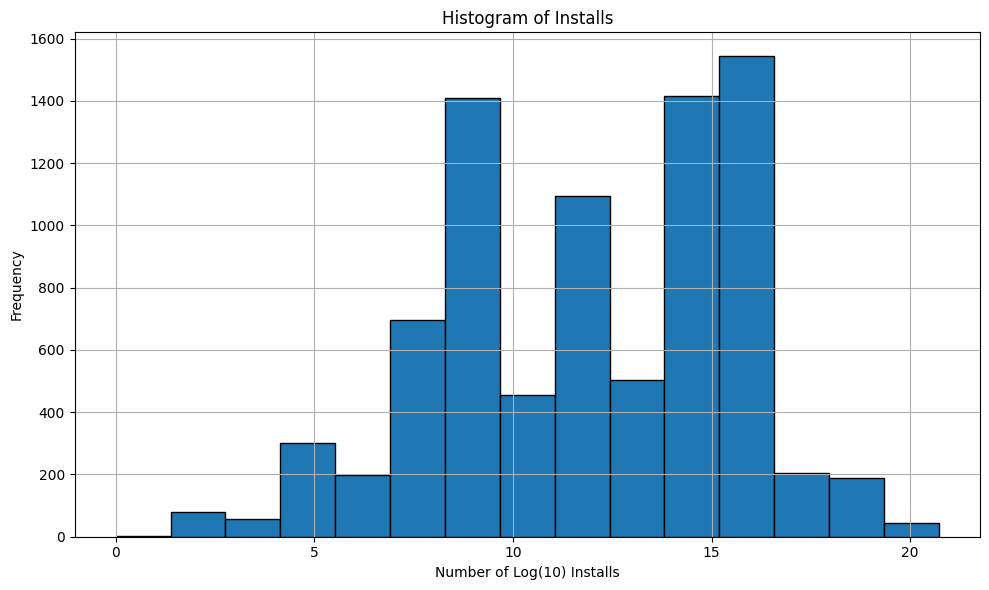

In [125]:
plt.figure(figsize=(10, 6))
plt.hist(np.log(df['Installs']), bins=15, edgecolor='black')
plt.title('Histogram of Installs')
plt.xlabel('Number of Log(10) Installs')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

We propose taking log of the installs to handle its skewed distribution and stabilize predictions

In [126]:
df['Free'] = df['Type'].apply(lambda x: 1 if x == 'Free' else 0)
df['Installs']= np.log(df['Installs'])
X_train, X_test, y_train, y_test = train_test_split(
    df[['Category', 'Rating', 'Free', 'Content Rating']],
    df['Installs'],
    test_size=0.2,
    random_state=42
)

In [132]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error
from scipy.stats import pearsonr
from xgboost import XGBRegressor

onehot_encoder = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', onehot_encoder, ['Category', 'Content Rating'])
    ],
    remainder='passthrough'
)


In [ ]:
# RandomForest with GridSearchCV
rf_pipeline = make_pipeline(
    preprocessor,
    RandomForestRegressor(random_state=42)
)

# Define parameter grid for GridSearchCV
param_grid = {
    'randomforestregressor__n_estimators': [100, 200],
    'randomforestregressor__max_depth': [10, 20, None],
    'randomforestregressor__min_samples_split': [2, 5]
}

# Perform GridSearchCV
rf_grid = GridSearchCV(rf_pipeline, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
rf_grid.fit(X_train, y_train)

# Get best RandomForest model
best_rf = rf_grid.best_estimator_

In [134]:
#Evaluate RandomForest
y_pred_rf = best_rf.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = root_mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
corr_rf, _ = pearsonr(y_test, y_pred_rf)

print("RandomForest (Tuned) Results:")
print(f"Best Parameters: {rf_grid.best_params_}")
print(f"Mean Absolute Error: {mae_rf:.2f}")
print(f"Root Mean Squared Error: {rmse_rf:.2f}")
print(f"R-squared: {r2_rf:.2f}")
print(f"Pearson Correlation: {corr_rf:.2f}")


RandomForest (Tuned) Results:
Best Parameters: {'randomforestregressor__max_depth': 20, 'randomforestregressor__min_samples_split': 5, 'randomforestregressor__n_estimators': 200}
Mean Absolute Error: 2.38
Root Mean Squared Error: 3.01
R-squared: 0.33
Pearson Correlation: 0.58


In [ ]:
# XGBoost
xgb_pipeline = make_pipeline(
    preprocessor,
    XGBRegressor(random_state=42)
)
xgb_param_grid = {
    'xgbregressor__n_estimators': [100, 200],
    'xgbregressor__max_depth': [3, 6],
    'xgbregressor__learning_rate': [0.01, 0.1]
}

xgb_grid = GridSearchCV(xgb_pipeline, xgb_param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
xgb_grid.fit(X_train, y_train)

# Get best XGBoost model
best_xgb = xgb_grid.best_estimator_

# Evaluate XGBoost
y_pred_xgb = best_xgb.predict(X_test)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = root_mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
corr_xgb, _ = pearsonr(y_test, y_pred_xgb)

print("\nXGBoost (Tuned) Results:")
print(f"Best Parameters: {xgb_grid.best_params_}")
print(f"Mean Absolute Error: {mae_xgb:.2f}")
print(f"Root Mean Squared Error: {rmse_xgb:.2f}")
print(f"R-squared: {r2_xgb:.2f}")
print(f"Pearson Correlation: {corr_xgb:.2f}")


XGBoost (Tuned) Results:
Best Parameters: {'xgbregressor__learning_rate': 0.1, 'xgbregressor__max_depth': 6, 'xgbregressor__n_estimators': 100}
Mean Absolute Error: 2.36
Root Mean Squared Error: 2.97
R-squared: 0.35
Pearson Correlation: 0.59



SHAP Feature Importance for XGBoost:


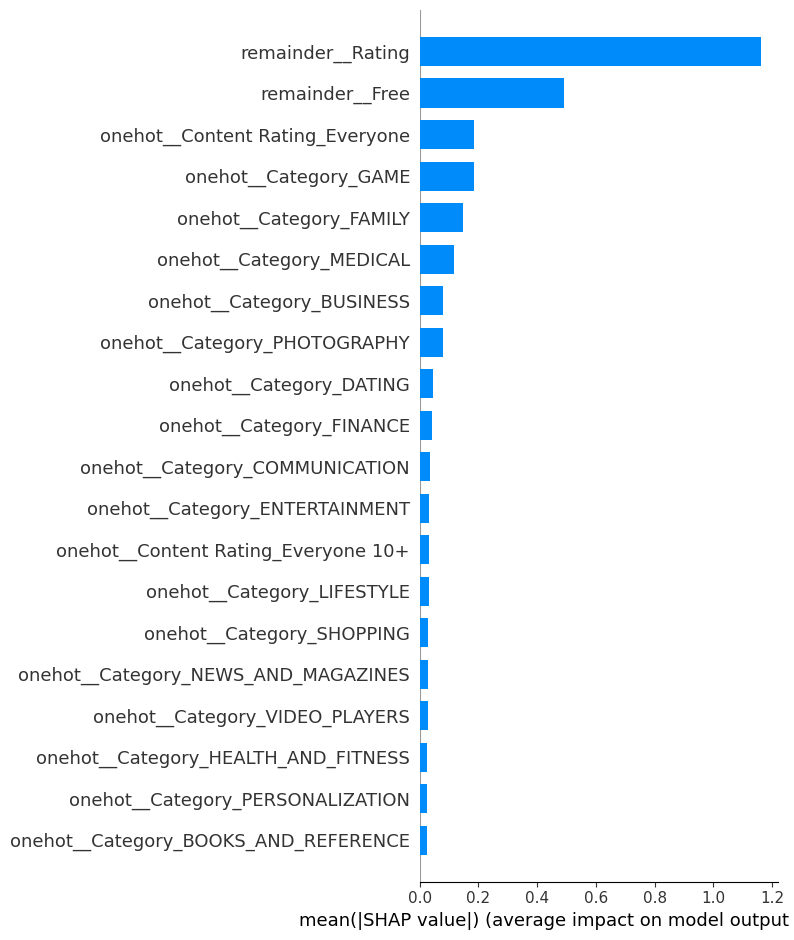

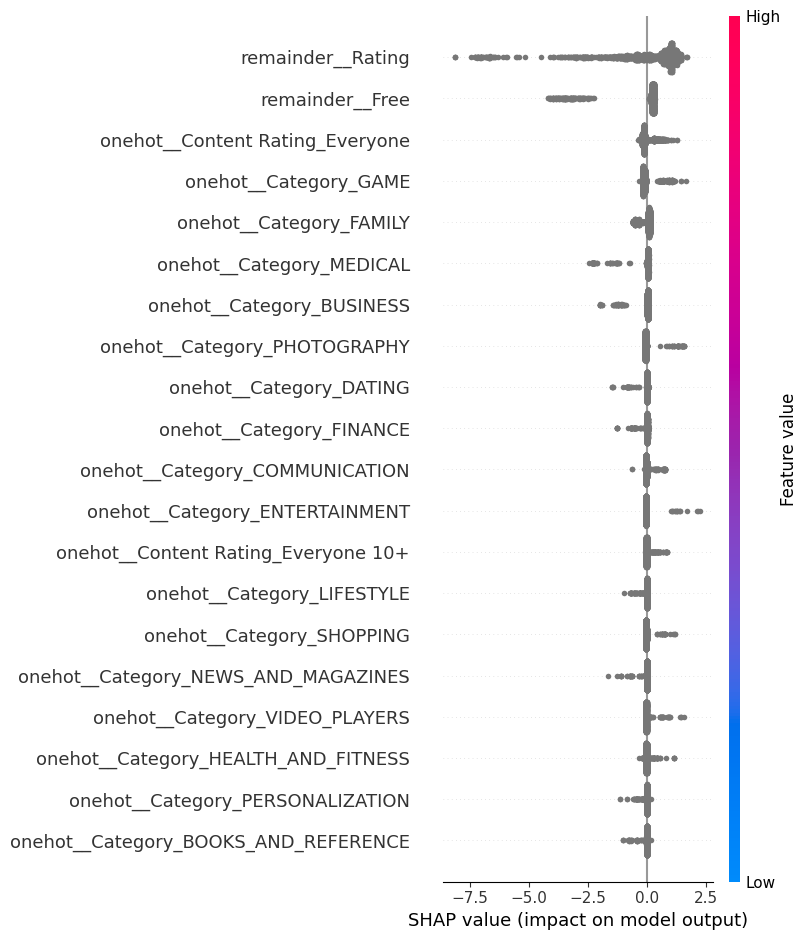


Top 5 Features by SHAP Importance:
                            Feature  Mean_SHAP
38                remainder__Rating   1.161899
39                  remainder__Free   0.490508
34  onehot__Content Rating_Everyone   0.184816
14            onehot__Category_GAME   0.184547
11          onehot__Category_FAMILY   0.146419


In [140]:
import shap
# Extract the preprocessor and XGBoost model from the pipeline
preprocessed_X_test = preprocessor.transform(X_test)
feature_names = preprocessor.get_feature_names_out()

# Initialize SHAP explainer for XGBoost
xgb_model = best_xgb.named_steps['xgbregressor']
explainer = shap.TreeExplainer(xgb_model)

# Compute SHAP values for test set
shap_values = explainer.shap_values(preprocessed_X_test)

# Plot SHAP summary (bar plot for feature importance)
print("\nSHAP Feature Importance for XGBoost:")
shap.summary_plot(shap_values, preprocessed_X_test, feature_names=feature_names, plot_type="bar")

# Plot SHAP summary (beeswarm plot for feature impact)
shap.summary_plot(shap_values, preprocessed_X_test, feature_names=feature_names)

# Print top 5 features by mean absolute SHAP value
shap_importance = np.abs(shap_values).mean(axis=0)
shap_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Mean_SHAP': shap_importance
}).sort_values(by='Mean_SHAP', ascending=False)

print("\nTop 5 Features by SHAP Importance:")
print(shap_importance_df.head(5))

# Show plots
plt.show()

SHAP analysis indicates that Rating and Free are the most influential features driving app installs, with higher ratings and free apps having a significant positive impact on predicted installs.

Among categories, GAME and FAMILY rank high in importance, suggesting these categories are associated with higher install potential.

The positive SHAP values for Free indicate that offering apps for free significantly boosts installs, likely due to broader accessibility.

These findings suggest that installs are driven by high user ratings, free availability, and specific categories like Games and Family.

### Recommendation:

- Prioritize Free Apps with freemium models: Develop new apps as free downloads, incorporating in-app purchases or subscription models (e.g., premium features, ad removal) to monetize effectively. For example, offer a free game with optional in-app purchases for virtual goods. We should focus on user acquisition first, then convert users to paying customers through engaging. 

- Target High-Rated Categories (Games and Family): Develop new apps in the Games and Family categories. For Games, create engaging, casual with high replay value. For Family, focus on educational tools or interactive apps for children. We should invest in quality design and content to achieve high ratings, as Rating is the top driver. Encourage user reviews to boost perceived quality.

- Optimize for High Ratings: Ensure apps are user-friendly, bug-free, and offer unique value to earn high ratings (e.g., 4.0+). We should offer incentives for reviews (e.g., in-app rewards) and respond to user feedback to maintain or improve ratings post-launch.